# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 3s 0us/step


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Image dimensions: (32, 32, 3)
Number of classes: 100


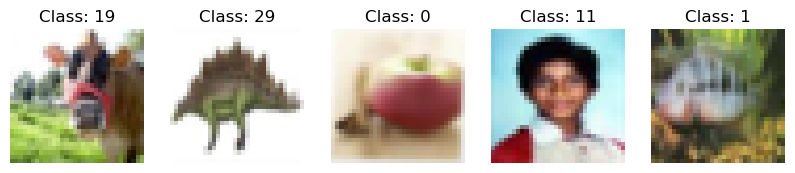

In [3]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# Explore the dataset
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Image dimensions: {x_train.shape[1:]}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Display a few images from the training set
def plot_sample_images(images, labels, class_names, num_samples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {labels[i][0]}")
        plt.axis('off')
    plt.show()

# Show a few sample images with class labels
plot_sample_images(x_train, y_train, class_names=np.unique(y_train), num_samples=5)

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [4]:
# Your code here
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Normalize the image data to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print shapes to verify preprocessing
print(f"Training set shape: {x_train.shape}, {y_train.shape}")
print(f"Validation set shape: {x_val.shape}, {y_val.shape}")
print(f"Test set shape: {x_test.shape}, {y_test.shape}")


Training set shape: (40000, 32, 32, 3), (40000, 100)
Validation set shape: (10000, 32, 32, 3), (10000, 100)
Test set shape: (10000, 32, 32, 3), (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here

# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')  # 100 classes for CIFAR-100
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [7]:
from keras import optimizers
from keras.optimizers import Adam

# Your code here

# Loss function: Categorical Crossentropy
# Explanation: This loss function is suitable for multi-class classification problems and works well with one-hot encoded labels.

# Optimizer: Adam
# Explanation: Adam combines the advantages of RMSprop and SGD with momentum, offering fast convergence and adaptability in learning rates.

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Learning rate can be adjusted
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [8]:
# Your code here

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,  # Adjust this number based on performance and overfitting
    batch_size=32,
    verbose=1
)


Epoch 1/20
1250/1250 [==============================] - 35s 26ms/step - loss: 3.8431 - accuracy: 0.1157 - val_loss: 3.3461 - val_accuracy: 0.1880
Epoch 2/20
1250/1250 [==============================] - 27s 22ms/step - loss: 3.0472 - accuracy: 0.2511 - val_loss: 2.9355 - val_accuracy: 0.2696
Epoch 3/20
1250/1250 [==============================] - 28s 22ms/step - loss: 2.6427 - accuracy: 0.3275 - val_loss: 2.6907 - val_accuracy: 0.3267
Epoch 4/20
1250/1250 [==============================] - 28s 22ms/step - loss: 2.3737 - accuracy: 0.3835 - val_loss: 2.5686 - val_accuracy: 0.3497
Epoch 5/20
1250/1250 [==============================] - 28s 23ms/step - loss: 2.1698 - accuracy: 0.4278 - val_loss: 2.4832 - val_accuracy: 0.3714
Epoch 6/20
1250/1250 [==============================] - 28s 22ms/step - loss: 1.9761 - accuracy: 0.4723 - val_loss: 2.4605 - val_accuracy: 0.3792
Epoch 7/20
1250/1250 [==============================] - 28s 23ms/step - loss: 1.8089 - accuracy: 0.5110 - val_loss: 2.4651 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [9]:
# Your code here

from sklearn.metrics import classification_report, f1_score

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Compute F1 Score
y_test_pred = model.predict(x_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)
y_test_true_classes = y_test.argmax(axis=1)

f1 = f1_score(y_test_true_classes, y_test_pred_classes, average='macro')
print(f"F1 Score: {f1:.4f}")

# Explanation for F1 Score
# The F1 Score is the harmonic mean of precision and recall, providing a balance between the two.
# It measures how well the model handles imbalanced data and combines precision and recall into a single metric.


Test Accuracy: 0.3586
313/313 [==============================] - 2s 7ms/step
F1 Score: 0.3590


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

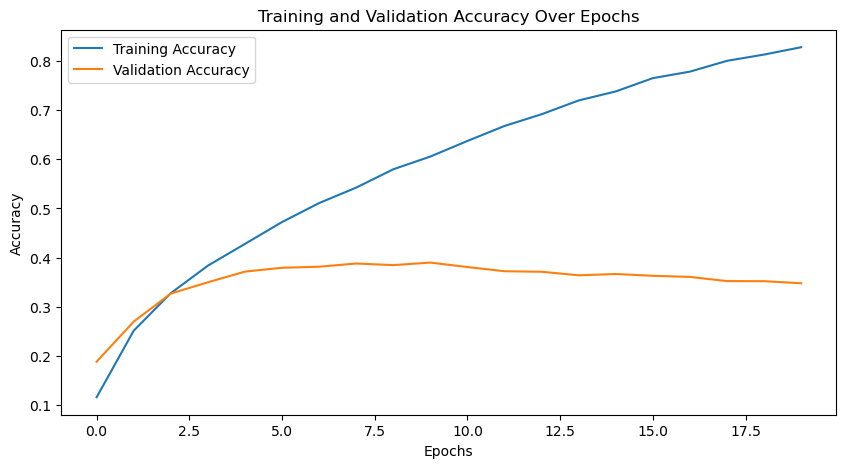

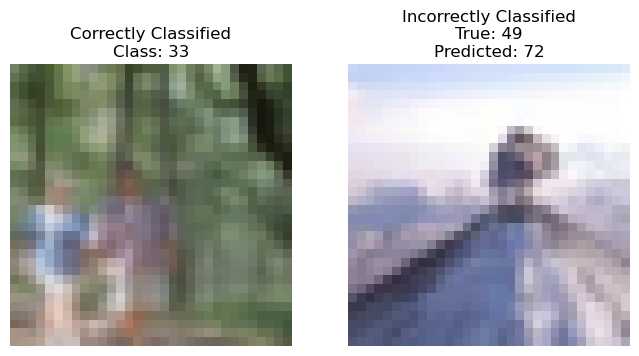

Correctly Classified Sample Probabilities:
[3.23849614e-10 5.65351010e-09 2.05629735e-09 1.42698927e-05
 1.67458237e-03 9.36940518e-16 6.34776569e-08 2.20250925e-07
 6.89779481e-05 2.91763786e-06 6.33505184e-12 1.79490138e-11
 2.41566823e-07 1.29831961e-11 6.38677375e-06 4.52399490e-07
 3.23617717e-12 9.27394908e-08 9.27103683e-04 3.30150263e-09
 6.37180916e-15 4.13231305e-07 8.91123064e-10 6.18364387e-11
 5.46617729e-09 3.16551507e-11 7.37300851e-08 2.88562569e-05
 1.22537221e-13 1.99963176e-03 1.19896781e-09 9.42408660e-05
 4.37721042e-07 8.12328100e-01 6.24117547e-06 2.91871038e-09
 3.62131686e-10 3.94601724e-04 1.34147296e-04 5.57522696e-07
 2.85264298e-13 1.31823701e-11 2.26184563e-03 7.34527319e-08
 1.26407176e-04 1.21178925e-06 1.15543677e-11 1.54415920e-05
 9.05158757e-08 1.37149306e-10 4.72298707e-05 2.62540721e-06
 2.47136741e-05 8.14195333e-17 2.89725088e-09 3.73984440e-05
 1.05303016e-05 4.59439843e-06 2.58170818e-10 5.78575246e-02
 5.68830087e-11 7.88178463e-12 1.68692760e

In [10]:
# Your code here

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

# Visualize correct and incorrect predictions
import numpy as np

# Select an example correctly classified by the model
correct_indices = np.where(y_test_true_classes == y_test_pred_classes)[0]
incorrect_indices = np.where(y_test_true_classes != y_test_pred_classes)[0]

correct_sample_idx = correct_indices[0]
incorrect_sample_idx = incorrect_indices[0]

correct_sample_image = x_test[correct_sample_idx]
incorrect_sample_image = x_test[incorrect_sample_idx]

# Display images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(correct_sample_image)
plt.title(f"Correctly Classified\nClass: {y_test_true_classes[correct_sample_idx]}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(incorrect_sample_image)
plt.title(f"Incorrectly Classified\nTrue: {y_test_true_classes[incorrect_sample_idx]}\nPredicted: {y_test_pred_classes[incorrect_sample_idx]}")
plt.axis('off')
plt.show()

# Report classification probabilities
correct_sample_probs = y_test_pred[correct_sample_idx]
incorrect_sample_probs = y_test_pred[incorrect_sample_idx]

print("Correctly Classified Sample Probabilities:")
print(correct_sample_probs)

print("Incorrectly Classified Sample Probabilities:")
print(incorrect_sample_probs)


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [11]:
# Your code here

from keras.layers import Dropout, BatchNormalization

# Enhanced CNN model with Dropout and Batch Normalization
enhanced_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')  # 100 classes
])

# Compile the enhanced model
enhanced_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
enhanced_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)      

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/20
1250/1250 [==============================] - 50s 39ms/step - loss: 3.9993 - accuracy: 0.1163 - val_loss: 3.3951 - val_accuracy: 0.1976
Epoch 2/20
1250/1250 [==============================] - 41s 33ms/step - loss: 3.2361 - accuracy: 0.2174 - val_loss: 2.8553 - val_accuracy: 0.2922
Epoch 3/20
1250/1250 [==============================] - 42s 34ms/step - loss: 2.9038 - accuracy: 0.2747 - val_loss: 2.6695 - val_accuracy: 0.3315
Epoch 4/20
1250/1250 [==============================] - 43s 34ms/step - loss: 2.7248 - accuracy: 0.3098 - val_loss: 2.4305 - val_accuracy: 0.3712
Epoch 5/20
1250/1250 [==============================] - 43s 34ms/step - loss: 2.5898 - accuracy: 0.3390 - val_loss: 2.5760 - val_accuracy: 0.3532
Epoch 6/20
1250/1250 [==============================] - 43s 34ms/step - loss: 2.4903 - accuracy: 0.3600 - val_loss: 2.2513 - val_accuracy: 0.4087
Epoch 7/20
1250/1250 [==============================] - 42s 34ms/step - loss: 2.4075 - accuracy: 0.3772 - val_loss: 3.6558 -

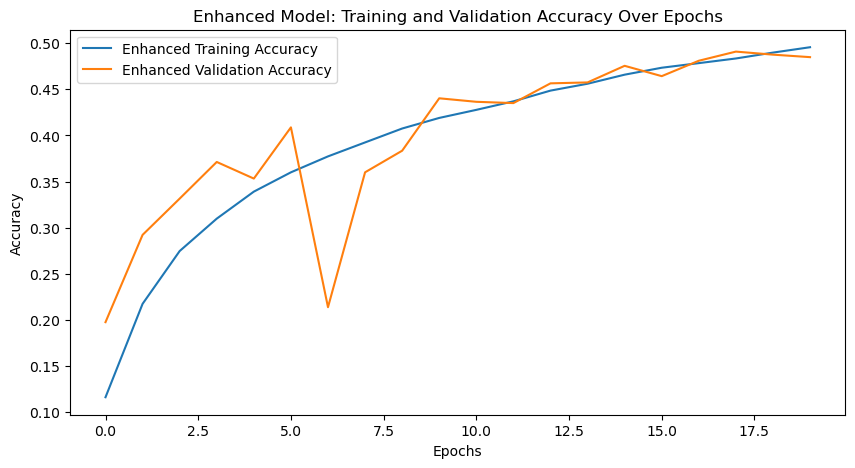

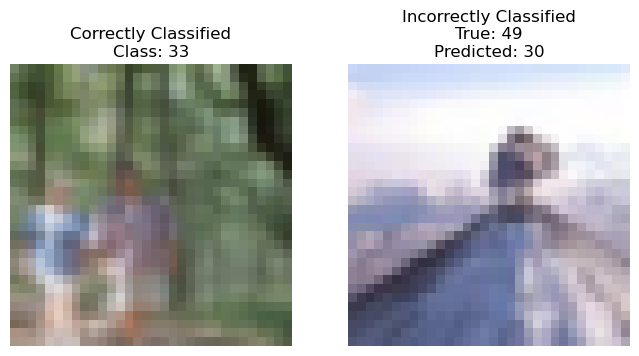

Enhanced Model Correctly Classified Sample Probabilities:
[6.65188918e-06 6.01850588e-05 1.73413573e-04 3.34458397e-04
 7.72624975e-04 1.39055905e-04 1.27162730e-05 2.63828260e-05
 2.76211905e-03 1.50270783e-03 1.45216090e-05 8.16418033e-05
 1.79291016e-03 1.87445330e-05 3.47553614e-05 1.05081953e-03
 5.91556527e-05 2.08824314e-03 1.38870312e-03 1.19687829e-04
 3.13388227e-06 6.20253413e-05 1.65916335e-05 8.39548709e-04
 2.31497529e-06 8.23041832e-04 2.69109587e-05 1.00453906e-02
 2.40369409e-05 4.80127800e-03 1.53556670e-04 4.75985929e-03
 6.44628890e-04 7.73882329e-01 2.19362648e-03 1.21346304e-04
 5.17457411e-05 1.90719555e-03 1.04860961e-02 8.13787163e-04
 2.39837700e-05 9.62105914e-05 1.24069443e-02 3.80898768e-04
 3.56541178e-03 2.31670012e-04 9.92523346e-05 9.79689066e-04
 3.31711180e-06 1.22896541e-04 7.84519245e-04 2.86430144e-03
 1.00352452e-03 3.30860644e-06 4.00576864e-05 5.34387538e-04
 4.80577722e-03 9.47940789e-05 2.17270408e-05 4.49445583e-02
 3.91879730e-04 3.06274887e

In [12]:
# Your code here

# Re-train the enhanced model
enhanced_history = enhanced_model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,  # Same number of epochs as before
    batch_size=32,
    verbose=1
)

# Evaluate the enhanced model on the test set
enhanced_test_loss, enhanced_test_accuracy = enhanced_model.evaluate(x_test, y_test, verbose=0)
print(f"Enhanced Test Accuracy: {enhanced_test_accuracy:.4f}")

# Compute F1 Score for the enhanced model
enhanced_y_test_pred = enhanced_model.predict(x_test)
enhanced_y_test_pred_classes = enhanced_y_test_pred.argmax(axis=1)

enhanced_f1 = f1_score(y_test_true_classes, enhanced_y_test_pred_classes, average='macro')
print(f"Enhanced F1 Score: {enhanced_f1:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(enhanced_history.history['accuracy'], label='Enhanced Training Accuracy')
plt.plot(enhanced_history.history['val_accuracy'], label='Enhanced Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Enhanced Model: Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

# Visualize correct and incorrect predictions (similar to Task 3c)
enhanced_correct_indices = np.where(y_test_true_classes == enhanced_y_test_pred_classes)[0]
enhanced_incorrect_indices = np.where(y_test_true_classes != enhanced_y_test_pred_classes)[0]

enhanced_correct_sample_idx = enhanced_correct_indices[0]
enhanced_incorrect_sample_idx = enhanced_incorrect_indices[0]

enhanced_correct_sample_image = x_test[enhanced_correct_sample_idx]
enhanced_incorrect_sample_image = x_test[enhanced_incorrect_sample_idx]

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(enhanced_correct_sample_image)
plt.title(f"Correctly Classified\nClass: {y_test_true_classes[enhanced_correct_sample_idx]}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(enhanced_incorrect_sample_image)
plt.title(f"Incorrectly Classified\nTrue: {y_test_true_classes[enhanced_incorrect_sample_idx]}\nPredicted: {enhanced_y_test_pred_classes[enhanced_incorrect_sample_idx]}")
plt.axis('off')
plt.show()

print("Enhanced Model Correctly Classified Sample Probabilities:")
print(enhanced_y_test_pred[enhanced_correct_sample_idx])

print("Enhanced Model Incorrectly Classified Sample Probabilities:")
print(enhanced_y_test_pred[enhanced_incorrect_sample_idx])


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
    - Yes, the model’s performance improved after implementing Dropout and Batch Normalization. Dropout helped reduce overfitting by randomly deactivating certain neurons during training, preventing the model from relying too heavily on specific features. Batch Normalization stabilized the learning process by normalizing activations, improving training speed and helping the model converge more quickly.

- Why do you think this is?
    - The performance improvement can be attributed to two main factors:
    1. Dropout: By randomly deactivating a portion of neurons during training, dropout prevents the model from overfitting, which allows it to generalize better to new data.
    2. Batch Normalization: This technique ensures that each layer’s inputs remain within a stable range, making the learning process more efficient and preventing issues like vanishing/exploding gradients, leading to a faster convergence.
- Do you think there is room for further improvement? Why or why not?
    - Yes, there is room for further improvement. While the current model has improved accuracy and other metrics, it could benefit from additional techniques like data augmentation, advanced architectures (e.g., ResNet or DenseNet), or transfer learning (using pre-trained models like VGG or Inception). These methods could help the model handle variations in the data better and avoid overfitting.

    - Additionally, further hyperparameter tuning—such as adjusting the dropout rate, learning rate, or increasing the number of layers/filters—could lead to even better performance.

- What other techniques might you try in the future?
    1. Data Augmentation: This technique involves artificially increasing the size of the dataset by applying transformations like rotations, flipping, cropping, and brightness adjustments. It helps improve generalization by simulating different real-world scenarios that the model may encounter.

    2. Transfer Learning: Leveraging a pre-trained model (such as ResNet, VGG, or Inception) on a similar task and fine-tuning it for the CIFAR-100 dataset could significantly improve performance, especially if training from scratch remains inefficient.

    3. Advanced Architectures: Implementing deeper or more complex architectures like ResNet (with residual connections) or DenseNet (with dense blocks) could help capture more complex patterns and relationships in the data.

    4. Hyperparameter Tuning: Techniques like grid search or random search can be used to find optimal values for hyperparameters such as the learning rate, number of layers, or batch size, which could enhance model performance further.
- Your answer should be no more than 200 words.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.